In [35]:
import keras 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD, Adam
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float')/255.0
x_test = x_test.astype('float')/255.0
x_train = x_train.reshape((x_train.shape[0]), -1)
x_test = x_test.reshape((x_test.shape[0]), -1)

In [11]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [22]:
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1) = plt.subplots(1, 1, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
#         ax2.plot(self.x, self.acc, label="accuracy")
#         ax2.plot(self.x, self.val_acc, label="validation accuracy")
#         ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

In [30]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='elu'))
model.add(Dropout(p=0.25))
model.add(Dense(256, activation='elu'))
model.add(Dropout(p=0.25))
model.add(Dense(128, activation='elu'))
model.add(Dropout(p=0.25))
model.add(Dense(64, activation='elu'))
model.add(Dense(10, activation='softmax'))

C:\Users\Akshay Deshpande\Anaconda3\envs\starter_knn\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.25)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshay Deshpande\Anaconda3\envs\starter_knn\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.25)`
  """
C:\Users\Akshay Deshpande\Anaconda3\envs\starter_knn\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.25)`
  import sys


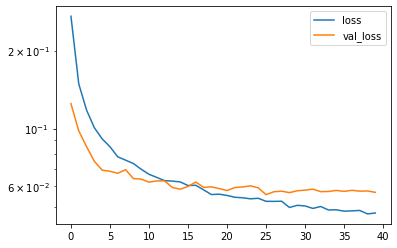

In [33]:
sgd = SGD(0.05, decay=0.05/40, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=64, callbacks=[plot], verbose=0)

In [42]:
predictions = model.predict(x_test, batch_size=64)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1),
                            target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

